In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('/content/drive/MyDrive/DataCamp/Python Track/EDA/clean_unemployment.csv')
df.head()

,country_code,country_name,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Afghanistan,Asia,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,AGO,Angola,Africa,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,ALB,Albania,Europe,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,ARE,United Arab Emirates,Asia,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,ARG,Argentina,South America,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90


## **Functions for initial exploration**

In [3]:
df.shape

(182, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  182 non-null    object 
 1   country_name  182 non-null    object 
 2   continent     177 non-null    object 
 3   2010          182 non-null    float64
 4   2011          182 non-null    float64
 5   2012          182 non-null    float64
 6   2013          182 non-null    float64
 7   2014          182 non-null    float64
 8   2015          182 non-null    float64
 9   2016          182 non-null    float64
 10  2017          182 non-null    float64
 11  2018          182 non-null    float64
 12  2019          182 non-null    float64
 13  2020          182 non-null    float64
 14  2021          182 non-null    float64
dtypes: float64(12), object(3)
memory usage: 21.5+ KB


In [6]:
df.describe()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,8.409286,8.315440,8.317967,8.344780,8.179670,8.058901,7.925879,7.668626,7.426429,7.243736,8.420934,8.390879
std,6.248887,6.266795,6.367270,6.416041,6.284241,6.161170,6.045439,5.902152,5.818915,5.696573,6.040915,6.067192
min,0.450000,0.320000,0.480000,0.250000,0.200000,0.170000,0.150000,0.140000,0.110000,0.100000,0.210000,0.260000
25%,4.015000,3.775000,3.742500,3.692500,3.625000,3.662500,3.800000,3.690000,3.625000,3.487500,4.285000,4.335000
50%,6.965000,6.805000,6.690000,6.395000,6.450000,6.170000,5.925000,5.650000,5.375000,5.240000,6.695000,6.425000
75%,10.957500,11.045000,11.285000,11.310000,10.695000,10.215000,10.245000,10.315000,9.257500,9.445000,11.155000,10.840000
max,32.020000,31.380000,31.020000,29.000000,28.030000,27.690000,26.540000,27.040000,26.910000,28.470000,29.220000,33.560000


## **Counting categorical values**

In [7]:
print(df['continent'].value_counts())

Africa           53
Asia             47
Europe           39
North America    18
South America    12
Oceania           8
Name: continent, dtype: int64


## **Global unemployment**

It's time to explore some of the numerical data in unemployment! What was typical unemployment in a given year? What was the minimum and maximum unemployment rate, and what did the distribution of the unemployment rates look like across the world? A histogram is a great way to get a sense of the answers to these questions.

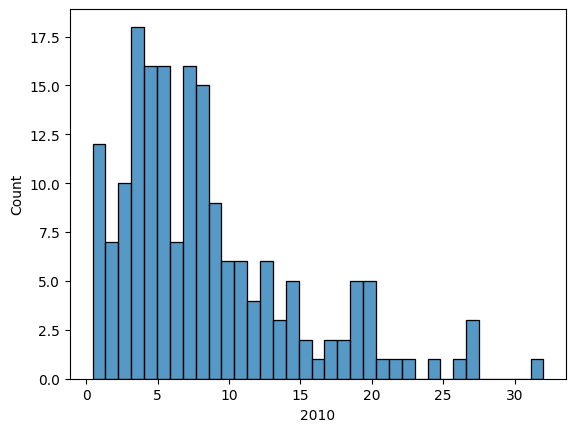

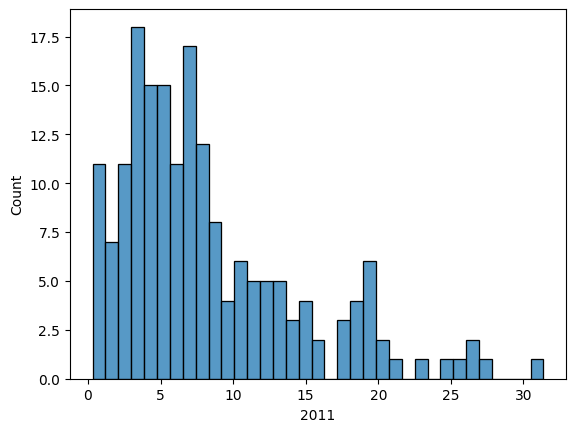

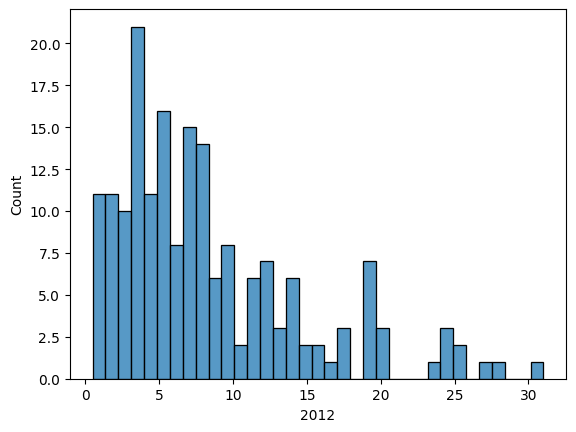

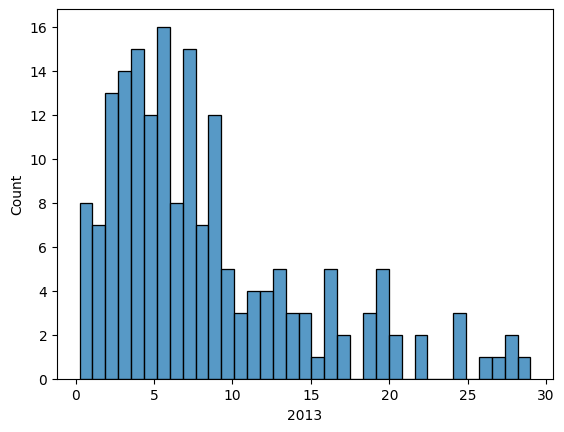

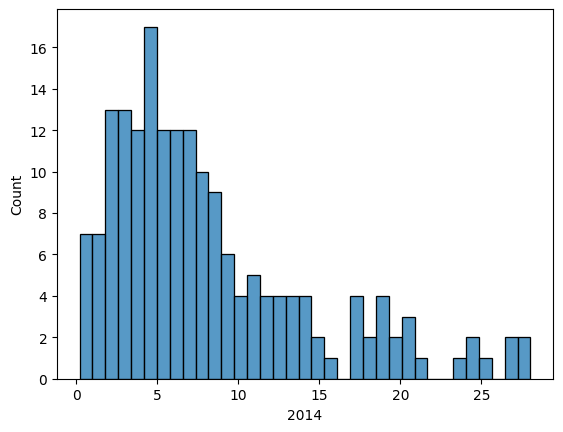

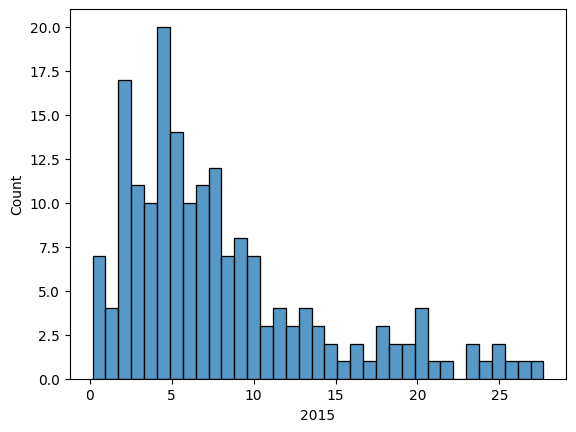

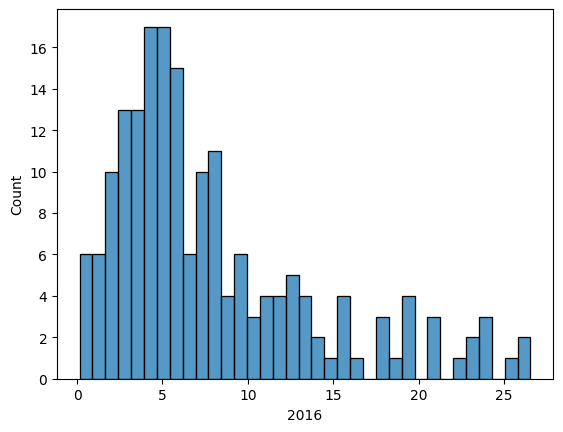

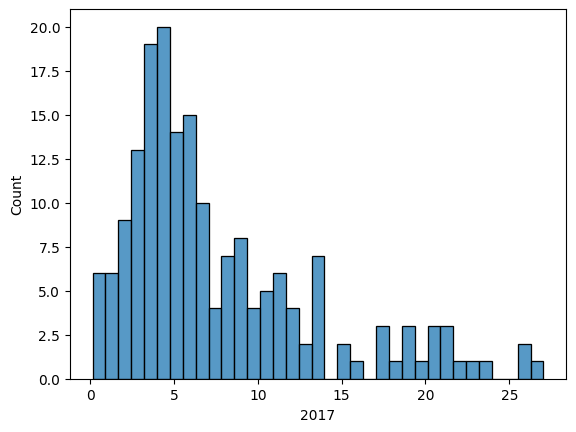

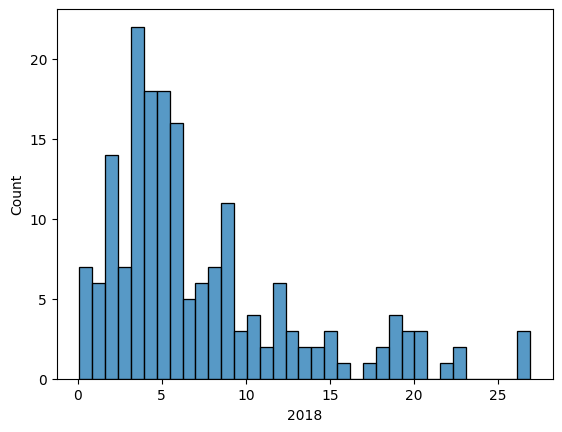

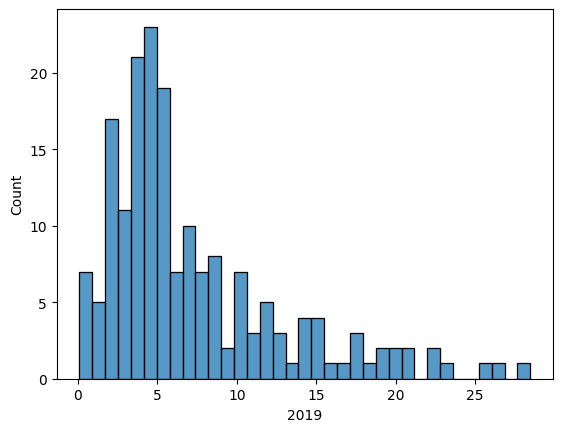

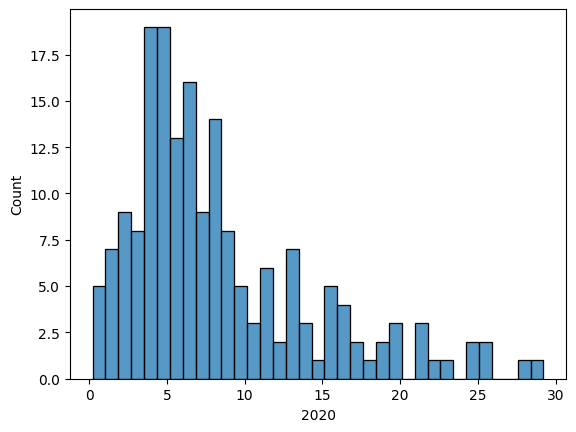

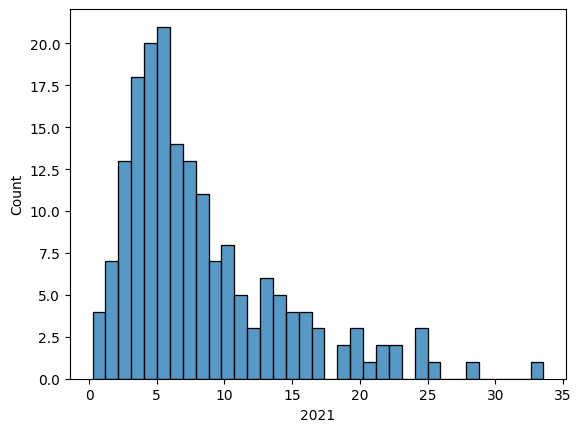

In [11]:
years = [str(year) for year in range(2010, 2022)]
for year in years:
  sns.histplot(x=year,data=df,bins=35)
  plt.show()

# **Validating continents**


---



My colleague has informed me that the data on unemployment from countries in Oceania is not reliable, and I'd like to identify and exclude these countries from your unemployment data. The `.isin()` function can help with that!

My task is to use `.isin()` to identify countries that are not in Oceania. These countries should return True while countries in Oceania should return False. This will set you up to use the results of `.isin()` to quickly filter out Oceania countries using Boolean indexing.

In [15]:
# Define a Series describing whether each continent is outside of Oceania
not_oceania = ~df['continent'].isin(['Oceania'])

# Print df without records related to countries in Oceania
print(df[not_oceania].head())

  country_code          country_name      continent   2010   2011   2012  \
0          AFG           Afghanistan           Asia  11.35  11.05  11.34   
1          AGO                Angola         Africa   9.43   7.36   7.35   
2          ALB               Albania         Europe  14.09  13.48  13.38   
3          ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4          ARG             Argentina  South America   7.71   7.18   7.22   

    2013   2014   2015   2016   2017   2018   2019   2020   2021  
0  11.19  11.14  11.13  11.16  11.18  11.15  11.22  11.71  13.28  
1   7.37   7.37   7.39   7.41   7.41   7.42   7.42   8.33   8.53  
2  15.87  18.05  17.19  15.42  13.62  12.30  11.47  13.33  11.82  
3   2.04   1.91   1.77   1.64   2.46   2.35   2.23   3.19   3.36  
4   7.10   7.27   7.52   8.11   8.35   9.22   9.84  11.46  10.90  


To return a Series of Booleans describing whether or not values are in a list, use `df["column"].isin(["item1", "item2"])`

To save time typing out all continent names, consider using `~` in front of your code so that you can search for all countries that are not in `["Oceania"]`.

# **Validating range**


---



Now it's time to validate our numerical data. We saw in the previous lesson using `.describe()` that the largest unemployment rate during 2021 was nearly 34 percent, while the lowest was just above zero.

My task in this exercise is to get much more detailed information about the range of unemployment data using Seaborn's boxplot, and I'll also visualize the range of unemployment rates in each continent to understand geographical range differences.

Min: 0.26 , Max: 33.56


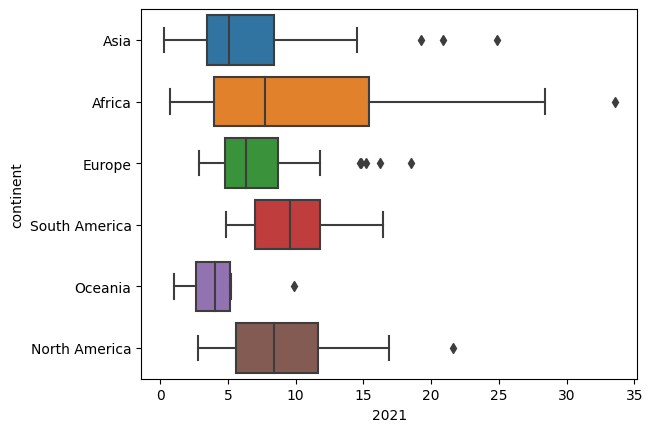

In [22]:
# Print the minimum and maximum unemployment rates during 2021
print('Min:',df['2021'].min(),',', 'Max:',df['2021'].max())

# Create a boxplot of 2021 unemployment rates, broken down by continent
sns.boxplot(data=df,x='2021',y='continent')
plt.show()

In [27]:
# Print 2021 mean grouped by continent
print(df.groupby('continent')['2021'].agg(['mean']))

                    mean
continent               
Africa         10.473585
Asia            6.906170
Europe          7.414872
North America   9.155000
Oceania         4.280000
South America   9.924167


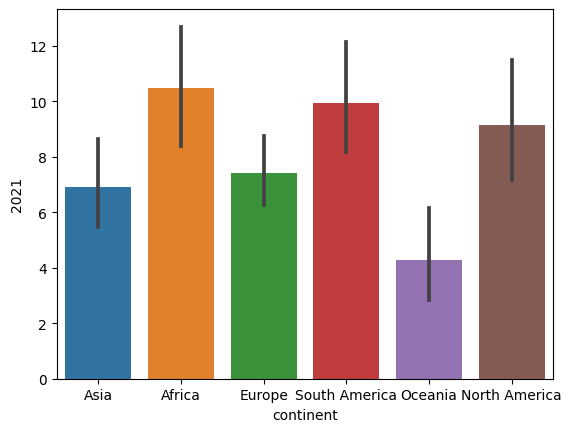

In [29]:
# Create a bar plot of continents and their average unemployment for 2021
sns.barplot(data=df,x='continent',y='2021')
plt.show()